# Grunnleggende om python

I denne notisbok går vi gjennom noen python verktøy som blir brukt i dette kurset. 

Vi ser hvordan vi kan bruke python i en jupyter notisbok til å gjøre helt enkle ting.

In [1]:
# @title Importering av jupyterquiz
# Her importeres en quizz modul for jupyter.
# Hvis den ikke allerede er installert blir den installert.
try:
  from jupyterquiz import display_quiz
except:
  !pip install jupyterquiz
  from jupyterquiz import display_quiz


La oss si at vi ønsker å finne løsningene til andregradsligningen $x^2 − 2x + 1 = 0$. 

Hvis vi skriver $a = 1$, $b = −2$ og $c = 1$,
da vet vi at løsningene er 

$x_1 = \frac{-b + \sqrt D}{2a}$ og $x_2 = \frac{-b - \sqrt D}{2a}$ der $D$ er diskriminanten $D = b^2 - 4ac$.

In [2]:
# Siden vi kommer til å bruke pakken numpy til å gjøre beregninger importerer vi den allerede nå.
# Bemerk at vi gir den et kortere navn eller alias "np". 
import numpy as np

## Kodesnutter

Under finner du en kodesnutt som skal finner disse løsningene. 

Uheldigvis forteller den ikke til oss hva løsningene er. 

Det blir første quizspørsmål i denne notisboken å svare på hva løsningene er.

In [3]:
# skriver inn koeffisientene til ligningen
a = 1
b = -2
c = 1

# Beregner diskriminanten D
D = b**2 - 4*a*c

# Beregner kvartratroden av D
sqrtD = np.sqrt(D)

# Beregner x_1
x_1 = (-b + sqrtD) / (2*a)

# Beregner x_2
x_2 = (-b - sqrtD) / (2*a)

In [4]:
# lenke til quizspørsmål
git_path="https://raw.githubusercontent.com/mbr085/V25MAT102/main/notebooks/uke3/"

In [5]:
display_quiz(git_path+"k1_1.json")

<IPython.core.display.Javascript object>

### <font color='Crimson'>Forklar til de som sitter rundt deg:</font>

Hvordan fant du ut hva verdiene til $x_1$ og $x_2$ er? 

<font color='Crimson'>
Løs andregradsligningen $x^2−5x+6=0$. Kan du enkelt endre på kodesnutten i celle `[4]` slik at den løser denne ligningen?
</font>

## Funksjoner

Hvis vi vil regne ut røtter til andregradsligninger på formen $ax^2 + bx + c$ kunne det være praktisk å kunne skrive noe i retning av 

$x_1 = f(a,b,c)$
og $x_2 = g(a,b,c)$ 

for to funksjoner $f$ og $g$ som avhenger de tre variablene $a$, $b$ og $c$. For eksempel kunne vi skrive
$$f(a,b,c) = \frac{-b + \sqrt{b^2 - 4ac}}{2a}$$

Kodesnutten over kan bli laget om til to slike funksjoner på denne måten:

In [7]:
def f(a, b, c):    
    # Beregner diskriminanten D
    D = b**2 - 4*a*c
    
    # Beregner kvartratroden av D
    sqrtD = np.sqrt(D)
    
    # Beregner x_1
    return (-b + sqrtD) / (2*a)

In [8]:
def g(a, b, c):    
    # Beregner diskriminanten D
    D = b**2 - 4*a*c
    
    # Beregner kvartratroden av D
    sqrtD = np.sqrt(D)
    
    # Beregner x_2
    return (-b - sqrtD) / (2*a)

Vi kan bruke funksjonene og til å finne andregradsligningen $x^2 - 5x + 6 = 0$:

In [9]:
f(1, -5, 6), g(1, -5, 6)

(np.float64(3.0), np.float64(2.0))

<font color='Crimson'>Bruk funksjonene $f$ og $g$ til å løse ligningen $x^2 - 4x + 4 = 0$.</font>

Det kan være hjelpsomt å gi funksjonene beskrivende navn:

In [21]:
def diskriminant(a, b, c):
    return b*b - 4 * a * c

def minste_rot(a, b, c):
    D = diskriminant(a, b, c)
    return (- b - np.sqrt(D)) / (2*a)

def største_rot(a, b, c):
    D = diskriminant(a, b, c)
    return (- b + np.sqrt(D)) / (2*a)

Hva 

In [22]:
minste_rot(2, -3, 1)

np.float64(0.5)

In [23]:
minste_rot(1, -3, 2)

np.float64(1.0)

In [24]:
største_rot(2, -3, 1)

np.float64(1.0)

In [25]:
største_rot(1, -3, 2)

np.float64(2.0)

En stor fordel med funksjoner er at vi kan unngå å skrive samme kodesnutt mange ganger. 

Hvis vi ser på funksjonene over ser vi at vi gjentar koden for beregningen av 
kvatratroten til diskriminanten $D$. 

Dette kan vi unngå ved innføre enda en funksjon `kvadratroten_av_D`. Vi kaller de nye versjonene av funksjonene som finner røtter for $ff$ og $gg$ for å unngå å bruke samme navn som vi har brukt tidligere. Hvis vi gjenbruker et navn vi har brukt før kan vi ikke sjekke at den nye funksjonen gir samme resultat som den gamle funksjonen. 

In [26]:
def kvatratroten_av_D(a, b, c):
    # Beregner diskriminanten D
    D = b**2 - 4*a*c
    # Beregner kvartratroden av D
    return np.sqrt(D)

def ff(a, b, c):
    return (-b + kvatratroten_av_D(a, b, c)) / (2*a)

def gg(a, b, c):
    return (-b - kvatratroten_av_D(a, b, c)) / (2*a)

In [27]:
f(1, 1, -1), ff(1, 1, -1), største_rot(1, 1, -1)

(np.float64(0.6180339887498949),
 np.float64(0.6180339887498949),
 np.float64(0.6180339887498949))

### <font color='Crimson'> Oppgave:</font>

<font color='Crimson'>Fyll inn innhold i python funksjonen `h` under, som gitt tre tall $a$, $b$ og $c$ skal beregne $a + b^2 - c^2$, og bruk den til å løse følgende quiz der du skal angi tallet $h(a, b, c) = a + b^2 - c^2$ for forskejllige kombinasjoner av tallene $a,$ $b$ og $c$:</font>

In [11]:
def h(a, b, c):
    return

In [12]:
display_quiz(git_path+"k1_2.json")

<IPython.core.display.Javascript object>

## Plotting av grafer

Det er mulig å tegne mange forskjellige figurer med pakken `matplotlib.pyplot`. For å bruke denne pakken må vi først importere den. Grunnen til dette er at det 
finnes mange pakker, og python ville blit alt for klossete og treg hvis alle verdens pakker ble inkludert som standard. 

Det finnes mange måter å importere pakker på. Vi kan velge å gi pakker et kort navn som vi enkelt kan huske. For pakken `matplotlib.pyplot` er det 
vanlig å gi den det korte navnet `plt`:

In [13]:
import matplotlib.pyplot as plt

Pakken `numpy` som vi allerede har importert med det korte navnet `np` kan gi oss tall som ligger jevnt mellom to endeverdier:

In [14]:
x = np.linspace(-2*np.pi, 2*np.pi, num=10)

Hvis vi vil se tallene vi har generert kan vi enkelt og greit spørre jupyter hva $x$ er for noe:

In [15]:
x

array([-6.28318531, -4.88692191, -3.4906585 , -2.0943951 , -0.6981317 ,
        0.6981317 ,  2.0943951 ,  3.4906585 ,  4.88692191,  6.28318531])

Pakken `numpy` (forkortet `np`) har mange innebyggede funksjoner som kan anvendes på lister av tall som listen `x` over. For eksempel sinus funksjonen. La oss anvende `np.sin` funksjonen 
på `x` og gi resultatet navnet `y`:

In [16]:
y = np.sin(x)

Vi kan nå plotte `x`-verdiene mot verdiene til `y = np.sin(x)`:

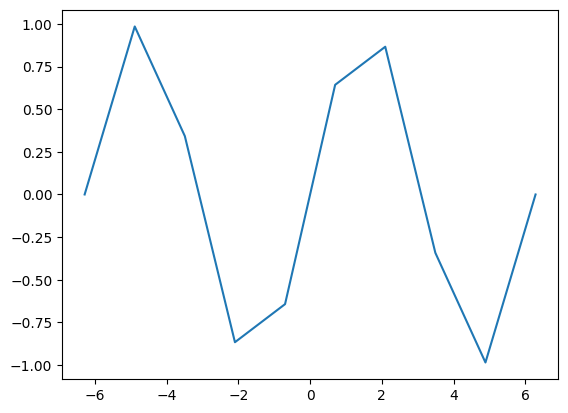

In [17]:
plt.plot(x, y)

Denne figuren er litt rar. Hvis vi velger å ta med flere `x`-verdier får vi en figur som viser bedre at det er sinusfunksjonen vi jobber med:

In [18]:
xx = np.linspace(-2*np.pi, 2*np.pi, num=100, endpoint=False)
yy = np.sin(xx)

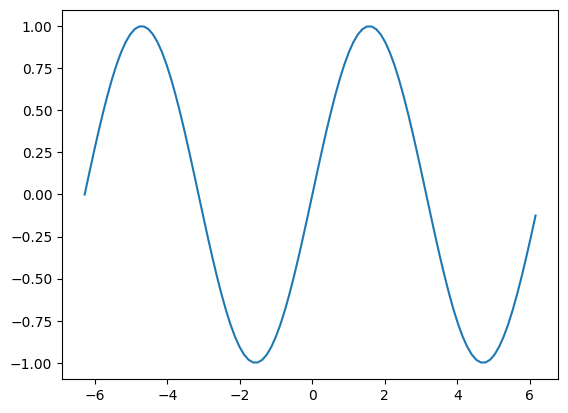

In [19]:
plt.plot(xx, yy);

Når vi tegner en figur kan det være hjelpsomt å ha med litt tekst i figuren, som tittel og betegnelse på aksene. Dette går greit med matplotlib:

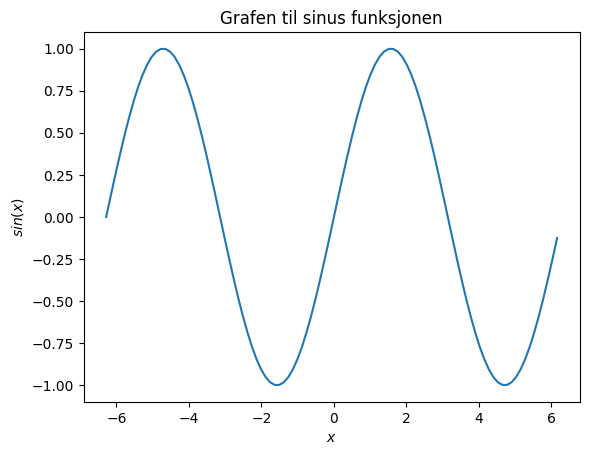

In [20]:
plt.plot(xx, np.sin(xx))
plt.title('Grafen til sinus funksjonen')
plt.xlabel('x')
plt.ylabel('sin(x)');

Det går også an å tegne koordinatakser. Denne typen arbeid er chatgpt veldig god til å hjelpe med.

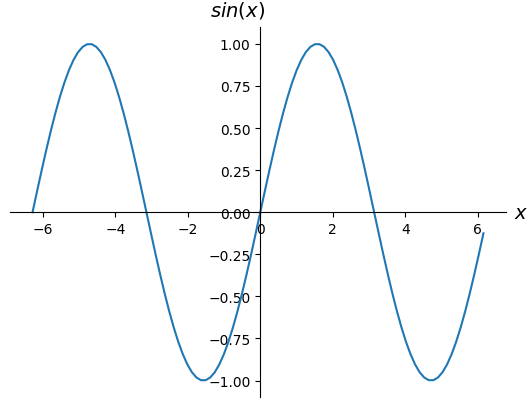

In [21]:
ax = plt.gca()
ax.plot(xx, np.sin(xx))
#plt.title('Grafen til sinus funksjonen')
#ax.set_xlabel('x')
ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('sin(x)', size=14, labelpad=-21, y=1.02, rotation=0)
#ax.set_ylabel('sin(x)')
# Set bottom and left spines as x and y axes of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### <font color='Crimson'> Oppgave:</font>

<font color='Crimson'>
Skriv kodesnutter som lager disse figurene:
</font>

Her kan det være lurt å spørre chatgpt eller Gemini om hjelp.

For eksempel kan du spørre på denne måten:

*"make a cosine wave plot with grid and coordinate axis where the xlabel is on the right and the ylabel is on the top"*

![Cosinus](cosinus.png)

![Cosinus](exp.png)


## Dataanalyse

Vi slutter denne notitsbok med å analysere et datasett. Først må vi laste inn et datasett, og deretter trenger vi å kunne visualisere deler av datasettet.

For å demonstrere på offentlig tilgjengelig data som det er enkelt å forholde seg til laster vi ned daglig meteologisk data for Bergen. For enkelthets skyld 
ser vi på daglig gjennomsnittstemperatur. Datasettet inneholder mere informasjon som vi ignorerer for nå.

Først importerer vi funksjonalitet som vi trenger. Modulen `pandas` blir importert med det korte navnet `pd` og modulen `meteostat` blir importert.

In [22]:
# Her importeres Point og Daily funksjonalitetene fra meteostat modulen.
# Hvis meteostat ikke allerede er installert blir den installert.
try:
  import meteostat
except:
  !pip install meteostat
  import meteostat

In [23]:
# Her importeres modulen pandas som pd

import pandas as pd

In [24]:
# Her importeres funksjonaliteten datetime fra modulen datetime.
# Datetime gir oss en bekvem måte å jobbe med tidsdate på.

from datetime import datetime, timedelta

In [25]:
# Sett tidsperioden vi vil hente data fra
# Data for fremtiden kan ikke lastes inn, så når vi ber om å laste inn data får vi data helt opp til i dag.

start = datetime(1973, 1, 1)
end = datetime.today()

In [26]:
# Vi angir GPS koordinatene til Bergen
# Google maps gir oss koordinatene under. Høyden gjetter jeg meg til.

bergen = meteostat.Point(60.38526, 5.328060, 10)

In [27]:
# Vi laster ned daglige målinger for den angitte tidsperioden

data = meteostat.Daily(bergen, start, end)
data = data.fetch()

<font color='Crimson'>
Hva er det vi plotter under?
</font>

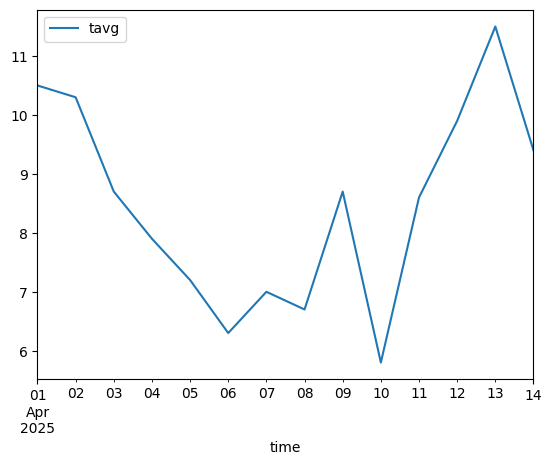

In [28]:
data.loc[end - timedelta(days=14): end].plot(y=['tavg'], style='-');

<font color='Crimson'>
    Stemmer data under overense med hva du har erfart?
</font>

In [29]:
data.loc[end - timedelta(days=14): end]

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2025-04-01,10.5,6.0,17.2,0.5,NaN,155.0,9.3,28.8,1031.4,NaN
2025-04-02,10.3,4.9,16.8,0.3,NaN,157.0,6.8,20.5,1032.3,NaN
2025-04-03,8.7,4.4,14.4,0.0,NaN,279.0,8.4,33.1,1030.4,NaN
2025-04-04,7.9,4.3,12.8,0.0,NaN,347.0,14.4,39.2,1027.4,NaN
2025-04-05,7.2,3.9,10.7,0.0,NaN,146.0,9.7,34.2,1027.7,NaN
2025-04-06,6.3,1.9,11.7,0.0,NaN,10.0,7.0,27.4,1030.8,NaN
2025-04-07,7.0,3.5,12.6,0.0,NaN,315.0,5.7,18.7,1027.2,NaN
2025-04-08,6.7,4.5,8.7,0.0,NaN,304.0,7.3,29.5,1029.3,NaN
2025-04-09,8.7,4.9,13.7,0.0,NaN,346.0,14.8,45.0,1026.7,NaN


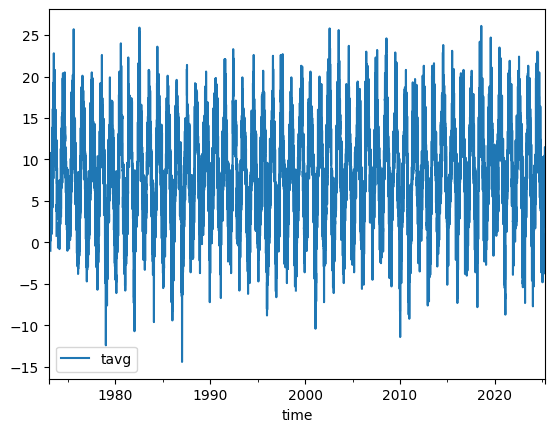

In [30]:
# Plot gjennomsnittstemperatur
data.plot(y=['tavg'])
plt.show()

### <font color='DarkCyan'> Spørsmål:</font>

<font color='Crimson'>Hva kan du si om temperaturen i Bergen når du ser på figuren over?</font>

<font color='Crimson'>Er der et spørsmål om temperaturen i Bergen du kunne ønske å få svar på gitt middeltemperaturen i byen hver dag helt siden 1973?</font>

La oss spørre litt om hva `data` egentlig er for noe. Enkleste måte å gjøre det på er ved å skrive `data` til python og se hva som skjer.

In [31]:
data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
1973-01-01,7.0,5.9,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973-01-02,7.6,6.4,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973-01-03,5.2,3.7,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973-01-04,6.3,4.8,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973-01-05,7.8,5.0,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-04-10,5.8,3.4,7.4,3.9,NaN,265.0,7.6,20.5,1023.0,NaN
2025-04-11,8.6,7.1,9.7,15.8,NaN,239.0,6.9,24.8,1012.7,NaN
2025-04-12,9.9,6.5,12.5,0.2,NaN,166.0,9.7,34.2,1009.6,NaN


Hvis vi vil vite litt mere om hva `data` er for noe kan vi spørre om typen til `data`.

In [32]:
type(data)

pandas.core.frame.DataFrame

Vi får å vite at `data` er en `DataFrame`. Dette er det næmeste vi kommer på et exel regneark i python. 
Et regneark kan leses inn i en `DataFrame` i python og en `DataFrame` kan eksporteres til en excel fil. 

Ser vi på informasjonen i `data` ser vi at det står `NaN` på mange plasser. Det betyr at vi mangler data på disse 
plassene. Det ser ut som om at det ikke mangler data i kolonnen `tavg`. Vi kan spørre hvor mange ganger det står `NaN` i denne kolonnen:

In [33]:
np.sum(np.isnan(data['tavg']))

np.int64(146)

Det er kjedelig. Det står `NaN` i kolonnen `tavg`!

### <font color='DarkCyan'> Spørsmål:</font>

<font color='Crimson'>Er der noen meningsfulle tall vi kan skrive inn på de plassene der informasjon mangler?</font>

<font color='Crimson'>Hva skjer i linjen under?</font>

Bruk gjerne google eller Gemini til å finne svaret!

In [34]:
data['tavg_ffill'] = data['tavg'].ffill()

<Axes: xlabel='time'>

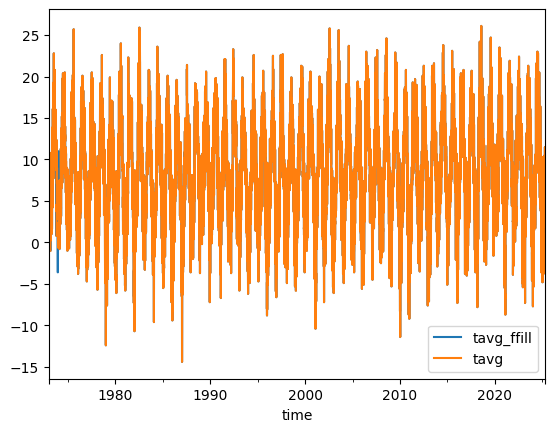

In [35]:
data.plot(y=['tavg_ffill', 'tavg'])

### <font color='DarkCyan'> Spørsmål:</font>

<font color='Crimson'>Hva skjer i linjen under?</font>

Bruk gjerne google eller Gemini til å finne svaret!

In [36]:
data['Rolling_Mean_tavg'] = data['tavg_ffill'].rolling(20*365).mean()

### <font color='DarkCyan'> Spørsmål:</font>

<font color='Crimson'>Hva forteller figuren under til oss?</font>

<Axes: xlabel='time'>

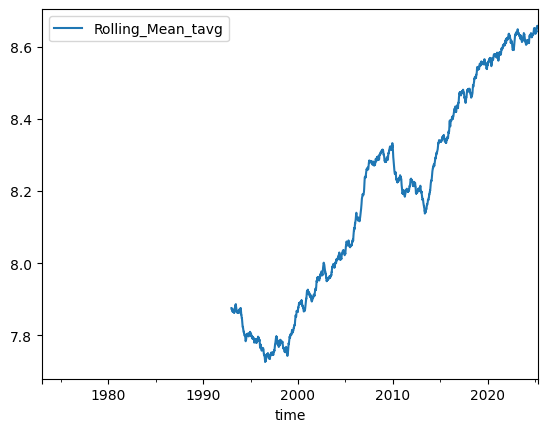

In [37]:
data.plot(y=['Rolling_Mean_tavg'])

### <font color='DarkCyan'> Spørsmål:</font>

<font color='Crimson'>Kan du lage en figur som forteller hvordan tiårlig gennomsnittstemperatur endrer seg?</font>